# Analisis Sentiment Lexicon Based Linkedin Singapura, dengan Algoritma Naive Bayes, Support Vector Machine, LSTM

## Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('linkedin_reviews_singapore_limited.csv')
df.head(100)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0a3ccf10-9c33-4115-a4ce-2b14da0a6c56,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,👍w,1,0,1.0.0,2024-10-04 12:07:55,NaN,NaN,1.0.0
1,89876024-45c2-427b-a1fe-e407b480f4e2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nice,5,0,4.1.990,2024-10-04 11:59:01,NaN,NaN,4.1.990
2,9e1d7b40-2baf-4d18-9503-fb9537ebc42e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good and useful,5,0,NaN,2024-10-04 11:53:05,NaN,NaN,NaN
3,dc474f71-091d-44ec-becf-050b5a7a6b68,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,An amazing Professional App for networking.,5,0,4.1.990,2024-10-04 11:50:46,NaN,NaN,4.1.990
4,10192fa9-b0cc-49cd-81af-4de1aad18cd6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Very useful,5,0,4.1.700,2024-10-04 11:49:00,NaN,NaN,4.1.700
5,6bb681c0-c8db-4a30-870a-7e7348ea48fb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,EXCELLENT THANKS,5,0,4.1.989,2024-10-04 11:39:04,Thank you for your feedback! We're thrilled to...,2024-08-11 12:05:56,4.1.989
6,73c94f61-befb-446a-9c63-6d8aee4b8465,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The best Job find App!!,5,0,4.1.987,2024-10-04 11:30:54,NaN,NaN,4.1.987
7,bc29e2b2-796e-4915-96b6-89240663af1d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,5,0,4.1.990,2024-10-04 11:18:01,NaN,NaN,4.1.990
8,8cda0ef8-bd27-495a-9a5c-7b436352ab02,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,hell,5,0,4.1.976,2024-10-04 11:17:42,NaN,NaN,4.1.976
9,59984d3f-aaa9-42bc-b4e9-f764e53bd195,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,4.1.987,2024-10-04 11:09:11,NaN,NaN,4.1.987


In [3]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

## Data Cleaning

In [4]:
df = df[['content', 'score']]
df.head(10)

,content,score
0,👍w,1
1,Nice,5
2,Good and useful,5
3,An amazing Professional App for networking.,5
4,Very useful,5
5,EXCELLENT THANKS,5
6,The best Job find App!!,5
7,Ok,5
8,hell,5
9,Good,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  9995 non-null   object
 1   score    10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [6]:
df.isnull().sum()

,0
content,5
score,0


In [7]:
df.isnull().any()

,0
content,True
score,False


In [8]:
# drop null

df.dropna(inplace=True)
df.isnull().sum()

,0
content,0
score,0


In [9]:
df.isna().sum()

,0
content,0
score,0


In [10]:
len(df)

9995

## Text Pre-Processing

In [11]:
# 1. Remove punctuation: Proses penghapusan simbol yang tidak relevan, nomor, tagar, dan tanda baca.
# 2. Case folding: Proses yang membuat huruf besar menjadi kecil sehingga tidak ada kesalahan
# mencocokan karakter atau huruf dalam kata-kata.
# 3. Stopword removal: Proses membuang kata-kata yang tidak berpengaru

import string
import re

def remove_punctuation(text):
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'#', '', text)
  return text

def case_folding(text):
  return text.lower()


df['content'] = df['content'].apply(remove_punctuation)
df['content'] = df['content'].apply(case_folding)

df.head(10)


,content,score
0,👍w,1
1,nice,5
2,good and useful,5
3,an amazing professional app for networking,5
4,very useful,5
5,excellent thanks,5
6,the best job find app,5
7,ok,5
8,hell,5
9,good,5


In [12]:
# stopword removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stop_words])


df['content'] = df['content'].apply(remove_stopwords)
df.head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,score
0,👍w,1
1,nice,5
2,good useful,5
3,amazing professional app networking,5
4,useful,5
5,excellent thanks,5
6,best job find app,5
7,ok,5
8,hell,5
9,good,5


In [13]:
# remove emoticon and install library emoticon

def remove_emojis(text):
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', text)

df['content'] = df['content'].apply(remove_emojis)

df.head(10)

,content,score
0,w,1
1,nice,5
2,good useful,5
3,amazing professional app networking,5
4,useful,5
5,excellent thanks,5
6,best job find app,5
7,ok,5
8,hell,5
9,good,5


In [14]:
# tokenizing

from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
  return word_tokenize(text)

df['content'] = df['content'].apply(tokenize_text)
df.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,content,score
0,[w],1
1,[nice],5
2,"[good, useful]",5
3,"[amazing, professional, app, networking]",5
4,[useful],5
5,"[excellent, thanks]",5
6,"[best, job, find, app]",5
7,[ok],5
8,[hell],5
9,[good],5


In [15]:
# stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['content'] = df['content'].apply(stem_text)
df.head(100)

,content,score
0,[w],1
1,[nice],5
2,"[good, use]",5
3,"[amaz, profession, app, network]",5
4,[use],5
5,"[excel, thank]",5
6,"[best, job, find, app]",5
7,[ok],5
8,[hell],5
9,[good],5


## Labeling

In [16]:
# labeling lexicon vader sentiment

!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
  scores = analyzer.polarity_scores(" ".join(text))
  if scores['compound'] >= 0.05:
    return 'Positive'
  elif scores['compound'] <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment'] = df['content'].apply(get_vader_sentiment)

df.head(100)

,content,score,sentiment
0,[w],1,Neutral
1,[nice],5,Positive
2,"[good, use]",5,Positive
3,"[amaz, profession, app, network]",5,Neutral
4,[use],5,Neutral
5,"[excel, thank]",5,Positive
6,"[best, job, find, app]",5,Positive
7,[ok],5,Positive
8,[hell],5,Negative
9,[good],5,Positive


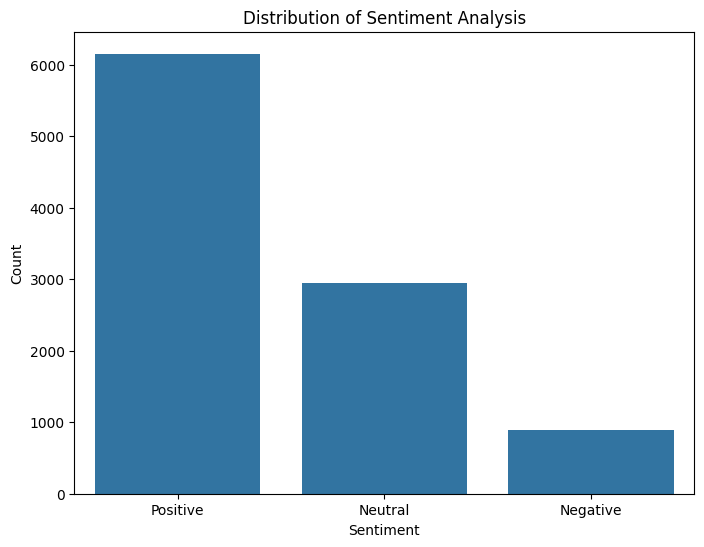

In [18]:
# plot distribution of sentiment analysis

import matplotlib.pyplot as plt
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

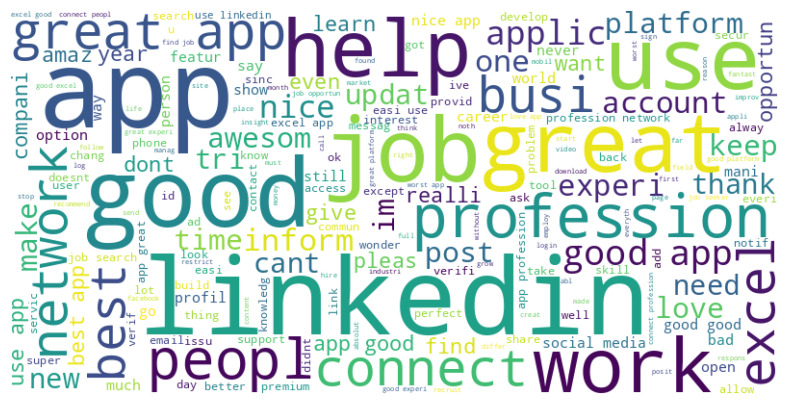

In [19]:
# wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all the text into a single string
all_words = ' '.join([' '.join(text) for text in df['content']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# naive bayes

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Join the stemmed words back into a string
df['content_str'] = df['content'].apply(lambda x: ' '.join(x))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['content_str'], df['sentiment'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.24      0.37       181
     Neutral       0.89      0.33      0.48       572
    Positive       0.71      0.99      0.83      1246

    accuracy                           0.73      1999
   macro avg       0.81      0.52      0.56      1999
weighted avg       0.77      0.73      0.69      1999


Confusion Matrix:
 [[  43   16  122]
 [   3  190  379]
 [   6    8 1232]]


In [21]:
# support vector machines

from sklearn.svm import SVC

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')  # You can experiment with different kernels
svm_classifier.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test_vec)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

print("\nSVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.93

SVM Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.75      0.78       181
     Neutral       0.89      0.96      0.92       572
    Positive       0.97      0.95      0.96      1246

    accuracy                           0.93      1999
   macro avg       0.89      0.88      0.89      1999
weighted avg       0.93      0.93      0.93      1999


SVM Confusion Matrix:
 [[ 136   24   21]
 [   9  548   15]
 [  21   47 1178]]


In [22]:
# lstm

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # You can adjust the number of words
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
max_sequence_length = 100  # You can adjust the sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Define the LSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # 3 output classes (Positive, Negative, Neutral)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f"LSTM Accuracy: {accuracy:.2f}")

# Make predictions
y_pred_lstm_encoded = np.argmax(model.predict(X_test_padded), axis=-1)
y_pred_lstm = label_encoder.inverse_transform(y_pred_lstm_encoded)

# Print classification report and confusion matrix
print("\nLSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))
print("\nLSTM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lstm))


Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 71s 277ms/step - accuracy: 0.6729 - loss: 0.7031 - val_accuracy: 0.8625 - val_loss: 0.3278
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 70s 227ms/step - accuracy: 0.9190 - loss: 0.2213 - val_accuracy: 0.9375 - val_loss: 0.2050
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 82s 226ms/step - accuracy: 0.9760 - loss: 0.0877 - val_accuracy: 0.9350 - val_loss: 0.2022
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 79s 213ms/step - accuracy: 0.9852 - loss: 0.0692 - val_accuracy: 0.9438 - val_loss: 0.1984
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 87s 236ms/step - accuracy: 0.9906 - loss: 0.0394 - val_accuracy: 0.9438 - val_loss: 0.2126
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9387 - loss: 0.2281
LSTM Accuracy: 0.93
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step

LSTM Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.76      0.77       181
     Neutral       0.92      0.94      0.93       572
    Positive       0.96

## Visualisasi Model dan Kesimpulan

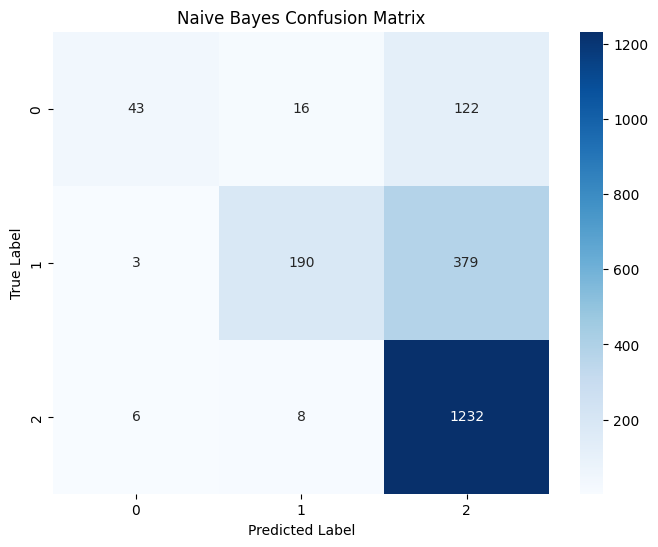

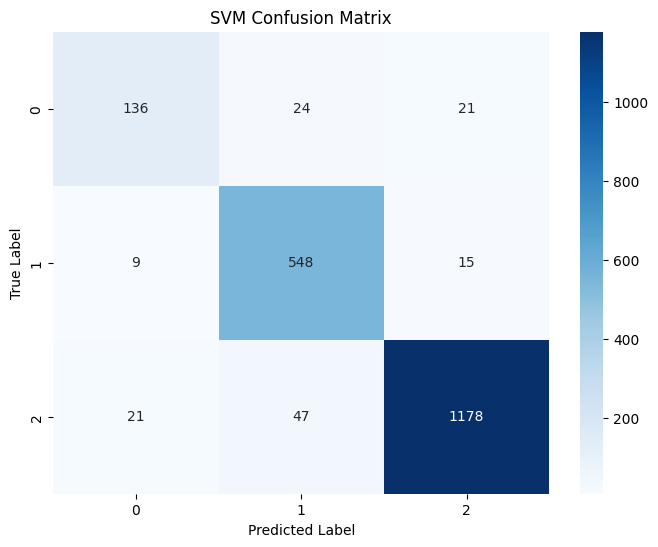

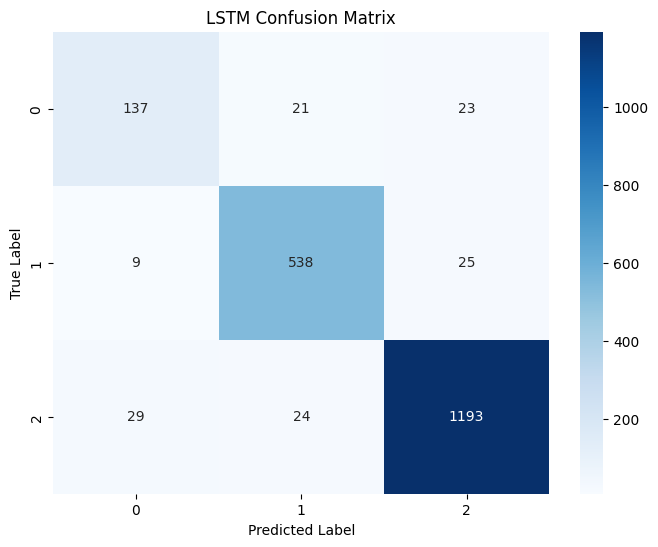

Kesimpulan:
Model Naive Bayes memiliki akurasi sebesar: 0.9344672560691833
Model SVM memiliki akurasi sebesar: 0.9314657328664332
Model LSTM memiliki akurasi sebesar: 0.9344672560691833


In [23]:
# Visualisasi Setiap Model dan Kesimpulan

import matplotlib.pyplot as plt
# Visualisasi Model dan Kesimpulan

# Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# LSTM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lstm), annot=True, fmt='d', cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Kesimpulan
print("Kesimpulan:")
print("Model Naive Bayes memiliki akurasi sebesar:", accuracy)
print("Model SVM memiliki akurasi sebesar:", accuracy_svm)
print("Model LSTM memiliki akurasi sebesar:", accuracy)

In [24]:
# get requirement txt

!pip freeze > requirements.txt